In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns; sns.set(style='ticks', color_codes=True)
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv('data/Placement_Data_Full_Class.csv')
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# sl_no - Serial Number
# ssc_p - Secondary Education Percentage - 10th Grade
# ssc_b - Board of Education - Central/Others
# hsc_p - Higher Secondary Education Percentage - 12th Grade
# hsc_b - Board of Education - Central/Others
# hsc_s - Specialization in Higher Secondary Education
# degree_p - Degree Percentage
# degree_t - Degree Type
# workex - Work Experience
# etest_p - Employability Test Percentage
# specialistation - Post Graduation
# mba_p - MBA Percentage
# status - Status of Placement
# salary - salary offered by corporate to candidates

In [6]:
print(dataset.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [8]:
explain that it's because some of them just don't have a job

31.16279069767442


In [9]:
# fill nan with 0's
dataset.fillna(value = 0, axis = 1, inplace = True)

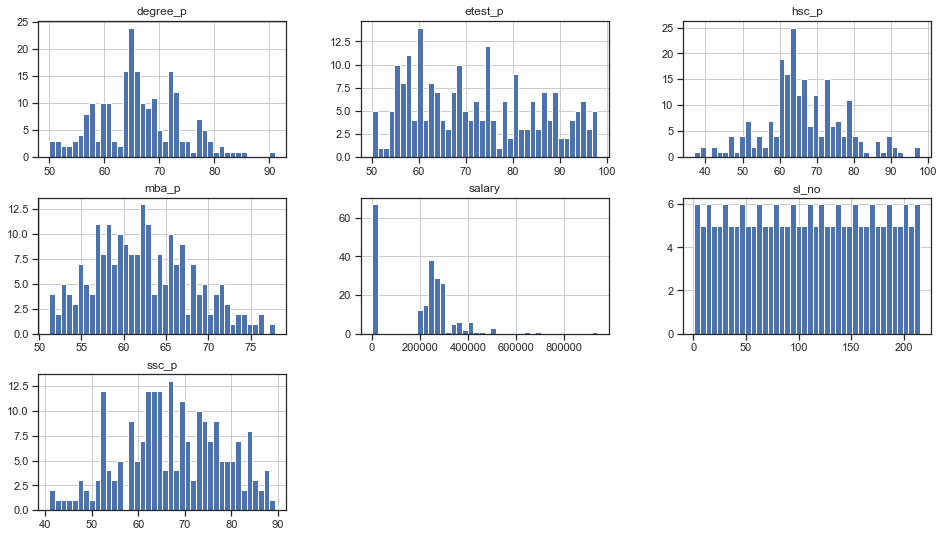

In [13]:
dataset.hist(bins = 40, figsize = (16, 9))
plt.show()

In [ ]:
###### which degree title/specialization is much demanded by corporate? #######

In [20]:
dataset[dataset['status'] == "Placed"]['degree_t'].value_counts()

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64

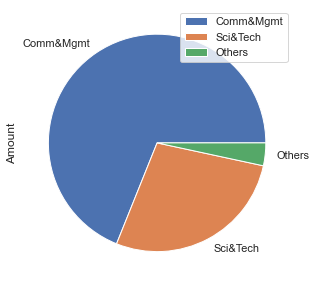

In [21]:
placement_data = pd.DataFrame(index=dataset[dataset['status'] == 'Placed']['degree_t'].value_counts().index)
placement_data['Amount'] = dataset[dataset['salary'] > 0]['degree_t'].value_counts().values
placement_data.plot.pie(y = 'Amount', figsize = (5, 5))

In [ ]:
# as in the chart, we can clearly see that majority of the corporates hire 
# people who graduated in Commercial & Management


In [22]:
dataset_working = dataset[dataset['status'] == 'Placed']
dataset_working.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [23]:
# return the amount of people working from each degree_t category
working_scitech = len(dataset_working[dataset_working['degree_t'] == 'Sci&Tech']['degree_t'])
working_commmgmt = len(dataset_working[dataset_working['degree_t'] == 'Comm&Mgmt']['degree_t'])
working_others = len(dataset_working[dataset_working['degree_t'] == 'Others']['degree_t'])

degree_distrib = dataset['degree_t'].value_counts()
# calculate what percentage of people of each degree_t category got a job
working_scitech_placed_per = working_scitech / degree_distrib['Sci&Tech'] * 100
working_commmgmt_placed_per = working_commmgmt / degree_distrib['Comm&Mgmt'] * 100
working_others_placed_per = working_others / degree_distrib['Others'] * 100

print("Sci&Tech: ", '%.2f' % working_scitech_placed_per, "%")
print("Comm&Mgmt: ", '%.2f' % working_commmgmt_placed_per, "%")
print("Others: ", '%.2f' % working_others_placed_per, "%")

Sci&Tech:  69.49 %
Comm&Mgmt:  70.34 %
Others:  45.45 %


In [24]:
print(dataset.groupby('degree_t')['degree_p'].mean())

degree_t
Comm&Mgmt    66.203103
Others       60.666364
Sci&Tech     67.844237
Name: degree_p, dtype: float64


In [ ]:
# it doesn't seem like people studying Comm&Mgmt are significantly 
# more intelligent than the ones studying Sci&Tech on average

In [ ]:
# does the specialisation determine who gets the job?


In [29]:
specialisation_distrib = dataset['specialisation'].value_counts()
working_mkthr = len(dataset_working[dataset_working['specialisation'] == 'Mkt&HR'])
working_mktfin = len(dataset_working[dataset_working['specialisation'] == 'Mkt&Fin'])

working_mkthr_per = working_mkthr / specialisation_distrib['Mkt&HR'] * 100
working_mktfin_per = working_mktfin / specialisation_distrib['Mkt&Fin'] * 100
print("Mkt&HR:", '%.2f' % working_mkthr_per,  "%")
print("Mkt&Fin:", '%.2f' % working_mktfin,  "%")

Mkt&HR: 55.79 %
Mkt&Fin: 95.00 %


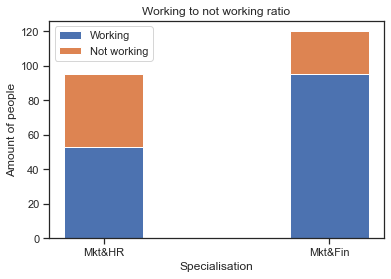

In [30]:
dataset_not_working = dataset[dataset['status'] == 'Not Placed']
not_working_mkthr = len(dataset_not_working[dataset_not_working['specialisation'] == 'Mkt&HR'])
not_working_mktfin = len(dataset_not_working[dataset_not_working['specialisation'] == 'Mkt&Fin'])

labels = ['Mkt&HR', 'Mkt&Fin']
working = [working_mkthr, working_mktfin]
not_working = [not_working_mkthr, not_working_mktfin]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, working, width, label='Working')
ax.bar(labels, not_working, width, bottom=working,
       label='Not working')

ax.set_ylabel('Amount of people')
ax.set_xlabel('Specialisation')
ax.set_title('Working to not working ratio')
ax.legend()

plt.show()

In [ ]:
# do your test scores matter? #

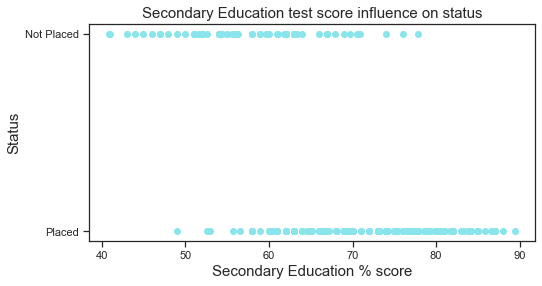

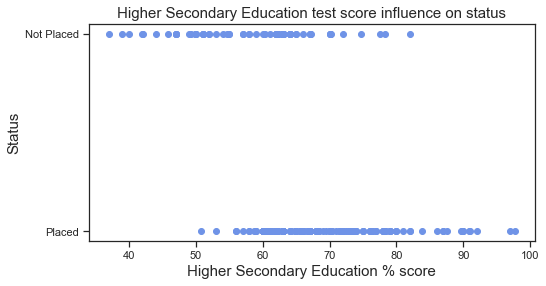

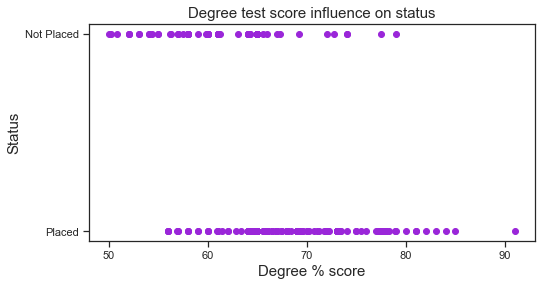

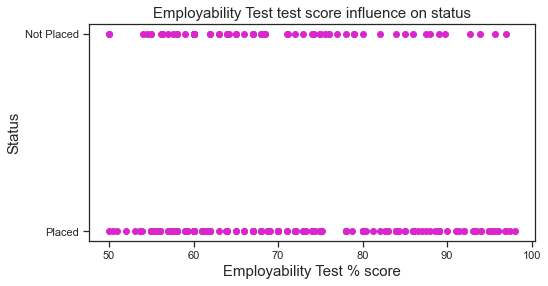

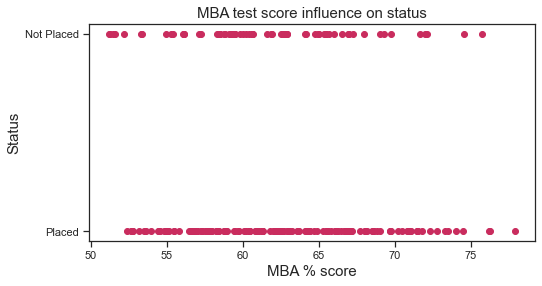

In [34]:
percentage_data = dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'workex']]
columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
names = ['Secondary Education', 'Higher Secondary Education', 'Degree', 'Employability Test', 'MBA']
colours = ['#89e5eb', '#6f93e7', '#9a26d9', '#d926cd', '#c92c5e', '#d12e2e']

for i, column in enumerate(columns):
    plt.figure(figsize = (8, 4))
    plt.scatter(x = percentage_data[column], y = percentage_data['status'], c = colours[i])
    plt.title(f'{names[i]} test score influence on status', fontsize = 15)
    plt.xlabel(f'{names[i]} % score', fontsize = 15)
    plt.ylabel('Status', fontsize = 15)
    plt.show()

C:\Users\krzys\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


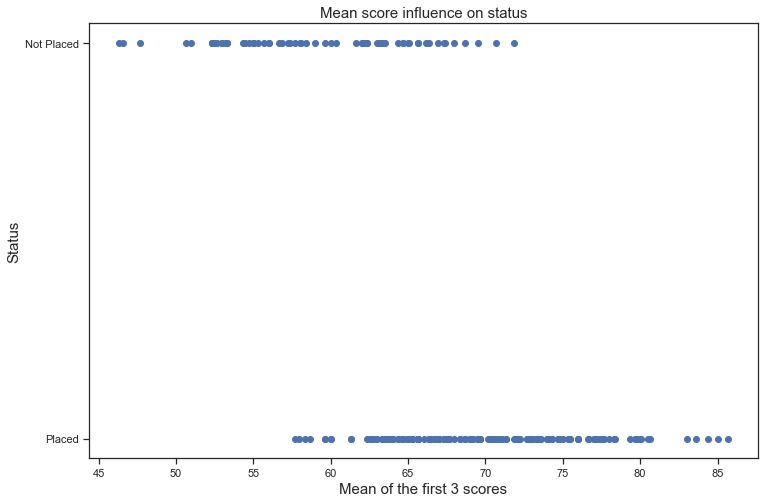

In [39]:
percentage_data['mean_of_score'] = percentage_data[['ssc_p', 'hsc_p', 'degree_p']].mean(axis = 1)

plt.figure(figsize = (12, 8))
plt.scatter(x = percentage_data['mean_of_score'], y = percentage_data['status'])
plt.title('Mean score influence on status', fontsize = 15)
plt.xlabel('Mean of the first 3 scores', fontsize = 15)
plt.ylabel('Status', fontsize = 15)
plt.show()

In [ ]:
############# does your previous work experience matter? ######################

In [47]:
people_placed = dataset[dataset['salary'] > 0]
print('Has experience:')
people_placed['workex'].value_counts()
# seems like corporates are indifferent to the previous work experience

Has experience:


No     84
Yes    64
Name: workex, dtype: int64

In [56]:
workex_job_p = len(dataset[(dataset['workex'] == 'Yes') & (dataset['status'] == "Placed")]) / len(dataset[dataset['workex'] == 'Yes']) * 100
no_workex_job_p = len(dataset[(dataset['workex'] == 'No') & (dataset['status'] == "Placed")]) / len(dataset[dataset['workex'] == 'No']) * 100
print("People with previous work experience had:", '%.2f' % workex_job_p, "% chance of getting hired")
print("People without previous work experience had:", '%.2f' % no_workex_job_p, "% chance of getting hired")

People with previous work experience had: 86.49 % chance of getting hired
People without previous work experience had: 59.57 % chance of getting hired


In [ ]:
""" TASKS FROM KAGGLE """
""" Association between 'mba_p' (outcome) and 'degree_p' (input) """

In [63]:
X_1 = dataset['degree_p']
y_1 = dataset['mba_p']

# N long scalar array to N x 1 matrix
X1 = np.array(X_1).reshape(-1, 1)
y1 = np.array(y_1).reshape(-1, 1)

In [67]:
X1_test, X1_train, y1_test, y1_train = train_test_split(X1, y1, train_size=0.25)
print("X1_train.shape", X1_train.shape, "X1_test.shape", X1_test.shape)
print("y1_train.shape", y1_train.shape, "y1_test.shape", y1_test.shape)

X1_train.shape (162, 1) X1_test.shape (53, 1)
y1_train.shape (162, 1) y1_test.shape (53, 1)


In [77]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X1_train, y1_train)
y_pred = lin_reg.predict(X1_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {'%.3f' % mse}")
print(f"RMSE: {'%.3f' % rmse}")

MSE: 34.110
RMSE: 5.840


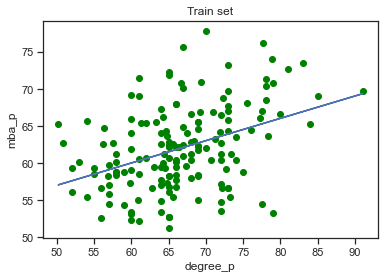

In [78]:
# Visualising train set
plt.figure()
plt.scatter(x=X1_train, y=y1_train, c='green')
plt.plot(X1_train, lin_reg.predict(X1_train))
plt.xlabel('degree_p')
plt.ylabel('mba_p')
plt.title('Train set')
plt.show()

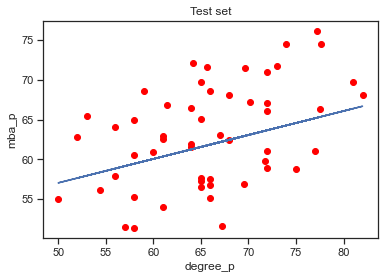

In [79]:
# Visualising test set
plt.figure()
plt.scatter(x=X1_test, y=y1_test, c='red')
plt.plot(X1_test, lin_reg.predict(X1_test))
plt.xlabel('degree_p')
plt.ylabel('mba_p')
plt.title('Test set')
plt.show()

In [80]:
print(f"Coefficient: {lin_reg.coef_[0][0]}")
# pretty low coefficient, low linear dependency

Coefficient: 0.3016113499874792


In [94]:
# get data
data_task = dataset[['ssc_p', 'hsc_p', 'mba_p']]
X2 = np.array(data_task.iloc[:,:2])
y2 = np.array(data_task.iloc[:, 2])

# train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)
lin_reg = LinearRegression(n_jobs=-1)

# fit features and labels
lin_reg.fit(X2_train, y2_train)
y2_pred = lin_reg.predict(X2_test)

print("y = ssc_p *", "%.2f" % lin_reg.coef_[0], " + hsc_p *", "%.2f" % lin_reg.coef_[1], "+", "%.2f" % lin_reg.intercept_)

y = ssc_p * 0.19  + hsc_p * 0.10 + 43.10


In [91]:
# check significance of the features
X2 = np.append(arr = np.ones(shape=(215, 1)).astype(float), values=X2, axis=1)
X_opt = X2[:, [0, 1, 2]]
regressor_OLS = sm.OLS(endog=y2, exog=X_opt).fit()
regressor_OLS.summary()
print('SSC_P p value: ', regressor_OLS._results.pvalues[1])
print('HSC_P p value: ', regressor_OLS._results.pvalues[2])

SSC_P p value:  1.0877571356315237e-222
HSC_P p value:  1.0877571356317091e-222


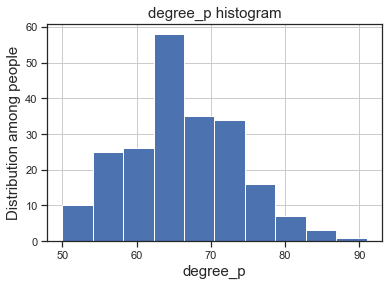

In [95]:
# 1. Histogram of degree_p
plt.figure()
plt.xlabel('degree_p', fontsize=15)
plt.ylabel('Distribution among people', fontsize=15)
plt.title('degree_p histogram', fontsize=15)
dataset['degree_p'].hist()


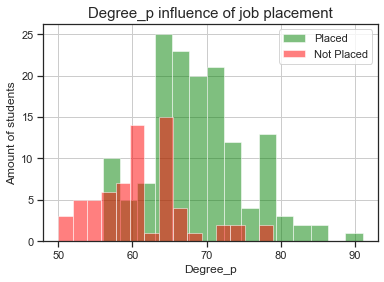

In [96]:
# 2. Differentiate based on status
plt.figure()
dataset[dataset['status'] == 'Placed']['degree_p'].hist(color='green', bins=15, alpha=0.5, label='Placed')
dataset[dataset['status'] == 'Not Placed']['degree_p'].hist(color='red', bins=15, alpha=0.5, label='Not Placed')
plt.title('Degree_p influence of job placement', fontsize=15)
plt.xlabel('Degree_p')
plt.ylabel('Amount of students')
plt.legend()
plt.show()

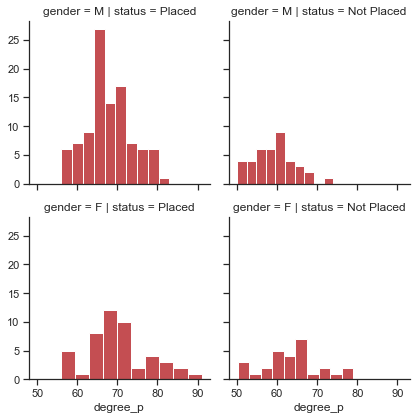

In [97]:
# 3. Separate gender
grid = sns.FacetGrid(dataset, col='status', row='gender')
grid = grid.map(plt.hist, 'degree_p', color='r')


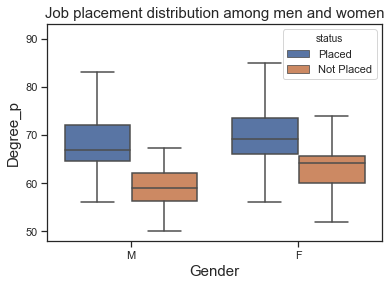

In [98]:
# 4. Boxplot for degree_p differentiating status and gender
boxplot_data = dataset[['gender', 'status', 'degree_p']]
plt.figure()
sns.boxplot(x='gender', y='degree_p', hue='status', 
            hue_order=['Placed', 'Not Placed'], data=boxplot_data, fliersize=0)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Degree_p', fontsize=15)
plt.title('Job placement distribution among men and women', fontsize=15)
plt.show()

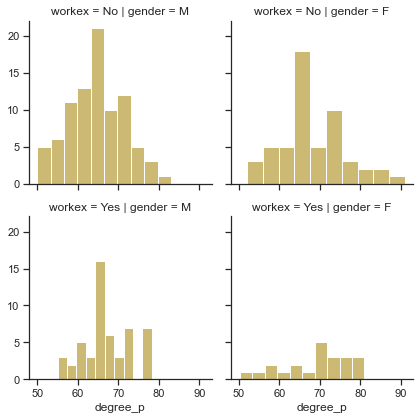

In [101]:
# 5.Introduce workex and gender
grid = sns.FacetGrid(dataset, col='gender', row='workex')
grid = grid.map(plt.hist, 'degree_p', color='y')

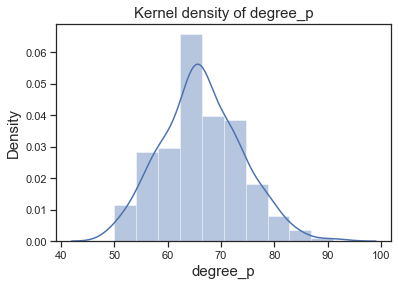

In [102]:
# 6. Draw a density plot for degree_p
plt.figure()
sns.distplot(a=dataset['degree_p'], bins=10)
plt.xlabel('degree_p', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Kernel density of degree_p', fontsize=15)
plt.show()

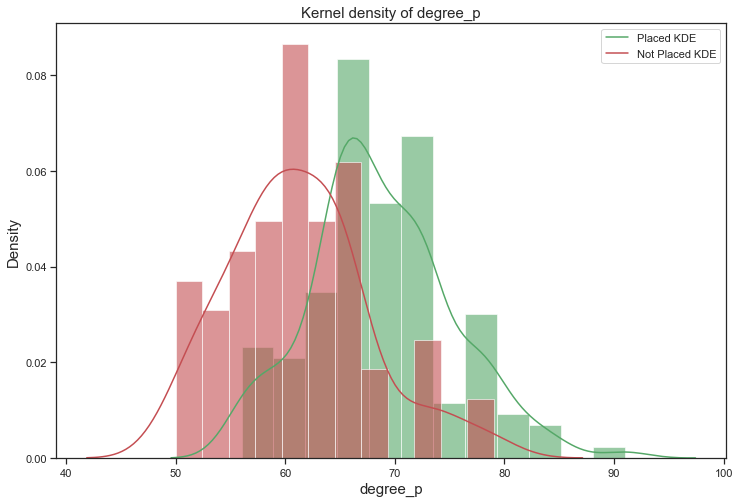

In [103]:
# 7. Beautify the plot 
plt.figure(figsize=(12, 8))
sns.distplot(a=dataset[dataset['status'] == 'Placed']['degree_p'], bins=12,
             kde_kws={'color': 'g', 'label': 'Placed KDE'},
             hist_kws={'color': 'g', 'alpha': 0.6})
sns.distplot(a=dataset[dataset['status'] == 'Not Placed']['degree_p'], bins=12,
             kde_kws={'color': 'r', 'label': 'Not Placed KDE'},
             hist_kws={'color': 'r', 'alpha': 0.6})
plt.xlabel('degree_p', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Kernel density of degree_p', fontsize=15)
plt.show()